In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk scikit-learn wordcloud

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.8 MB 14.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.8 MB 5.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/7.8 MB 7.3 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 6.3 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 10.7 MB/s eta 0:00:01
   ----------------------------

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
# Download nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dathasai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dathasai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dathasai\AppData\Roaming\nltk_data...


True

In [7]:
# Load dataset
df = pd.read_csv('df_m.csv')

In [8]:
# Assuming there's a 'text' column in the dataset
df['text'] = df['text'].astype(str)

In [9]:
# Tokenization
df['tokenized'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

In [10]:
# Stop Words Removal
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

In [11]:
# Stemming
ps = PorterStemmer()
df['stemmed'] = df['stopwords_removed'].apply(lambda x: [ps.stem(word) for word in x])

In [12]:
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [13]:
# Display intermediate output in tabular form till lemmatization
print(df[['tokenized', 'stopwords_removed', 'stemmed', 'lemmatized']])

                                               tokenized  \
0      [@, cloudflare, reports, #, ransom, #, ddos, a...   
1      [here, ’, s, the, one, thing, you, mustn, ’, t...   
2      [@, tactikoolsec, there, was, the, time, where...   
3      [ransomware, is, a, fast-growing, threat, impa...   
4      [five, key, cloud, and, innovation, takeaways,...   
...                                                  ...   
36075  [the, uk, ’, s, national, cyber, security, cen...   
36076  [free, crypto, coins, tips, :, lg, and, mitsub...   
36077  [conti, ransomware, deployed, in, icedid, bank...   
36078  [rt, @, middleeastmnt, :, poland, admits, usin...   
36079  [#, conti, claims, to, have, hacked, barwick, ...   

                                       stopwords_removed  \
0      [@, cloudflare, reports, #, ransom, #, ddos, a...   
1      [’, one, thing, ’, tell, hackers, business, su...   
2      [@, tactikoolsec, time, not-so-great-at-their-...   
3      [ransomware, fast-growing, threa

In [20]:
vectorizer_bow = CountVectorizer(analyzer=lambda x: x, max_features=10000)  # Adjust the number as needed
X_bow = vectorizer_bow.fit_transform(df['lemmatized'])
df_bow = pd.DataFrame.sparse.from_spmatrix(X_bow, columns=vectorizer_bow.get_feature_names_out())
print("\nReduced Bag of Words (BoW):\n", df_bow)


Reduced Bag of Words (BoW):
        !   #  $  %  &  '  ''  'advanced  'contact  'd  ...  🤮  🤯  🤷‍♂️  🥴  🦈  \
0      0  10  0  3  0  0   0          0         0   0  ...  0  0     0  0  0   
1      0   0  0  0  0  0   0          0         0   0  ...  0  0     0  0  0   
2      0   0  0  0  0  0   0          0         0   0  ...  0  0     0  0  0   
3      0   2  0  0  0  0   0          0         0   0  ...  0  0     0  0  0   
4      0  15  0  0  1  0   0          0         0   0  ...  0  0     0  0  0   
...   ..  .. .. .. .. ..  ..        ...       ...  ..  ... .. ..   ... .. ..   
36075  0   0  0  0  0  0   0          0         0   0  ...  0  0     0  0  0   
36076  0   6  0  0  0  0   0          0         0   0  ...  0  0     0  0  0   
36077  0   0  0  0  0  0   0          0         0   0  ...  0  0     0  0  0   
36078  0   0  0  0  0  0   0          0         0   0  ...  0  0     0  0  0   
36079  0   4  0  0  0  0   0          0         0   0  ...  0  0     0  0  0   

       🦠 

In [21]:
# Keep the TF-IDF as a sparse matrix to save memory
df_tfidf_sparse = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=vectorizer_tfidf.get_feature_names_out())
print("\nSparse TF-IDF:\n", df_tfidf_sparse)



Sparse TF-IDF:
          !         #    $        %         &    '   ''  '0mega  '10  '10s  \
0      0.0  0.393717  0.0  0.31251  0.000000  0.0  0.0     0.0  0.0   0.0   
1      0.0  0.000000  0.0  0.00000  0.000000  0.0  0.0     0.0  0.0   0.0   
2      0.0  0.000000  0.0  0.00000  0.000000  0.0  0.0     0.0  0.0   0.0   
3      0.0  0.132130  0.0  0.00000  0.000000  0.0  0.0     0.0  0.0   0.0   
4      0.0  0.720743  0.0  0.00000  0.105295  0.0  0.0     0.0  0.0   0.0   
...    ...       ...  ...      ...       ...  ...  ...     ...  ...   ...   
36075  0.0  0.000000  0.0  0.00000  0.000000  0.0  0.0     0.0  0.0   0.0   
36076  0.0  0.333600  0.0  0.00000  0.000000  0.0  0.0     0.0  0.0   0.0   
36077  0.0  0.000000  0.0  0.00000  0.000000  0.0  0.0     0.0  0.0   0.0   
36078  0.0  0.000000  0.0  0.00000  0.000000  0.0  0.0     0.0  0.0   0.0   
36079  0.0  0.190982  0.0  0.00000  0.000000  0.0  0.0     0.0  0.0   0.0   

       ...  🪱🐔🌄  🪱🪱🪱    🫠   🫠🆗   🫠🫠    🫡    🫢    🫣    🫤   

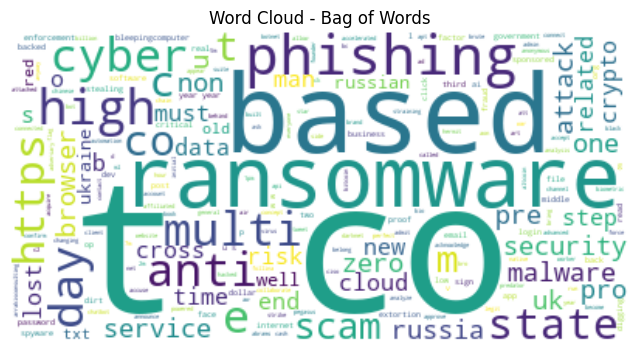

In [22]:
# Word Cloud for Bag of Words
wordcloud_bow = WordCloud(background_color='white').generate(' '.join(vectorizer_bow.get_feature_names_out()))
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_bow, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Bag of Words')
plt.show()

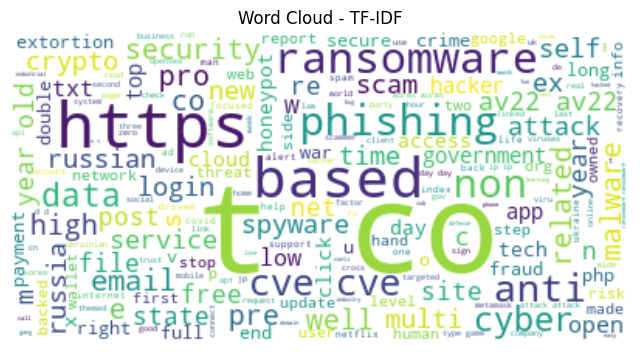

In [23]:
# Word Cloud for TF-IDF
wordcloud_tfidf = WordCloud(background_color='white').generate(' '.join(vectorizer_tfidf.get_feature_names_out()))
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - TF-IDF')
plt.show()